In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import fitGS
import fit1QSm
from PHMGS import *
from PHM1QSm import *
from H2_diat import *
print(fit3d.__doc__)
print(diatphm.__doc__)

NameError: name 'fit3d' is not defined

1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.1725682988303866
1.4141414141414141 -0.172

/tmp/ipykernel_1526116/2915348884.py:51: UserWarning: The following kwargs were not used by contour: 'ls'
  plt.contour(R12, R23, E, levels=levels_cnt, colors='black', linewidths=0.5, ls=":",alpha=0.5)


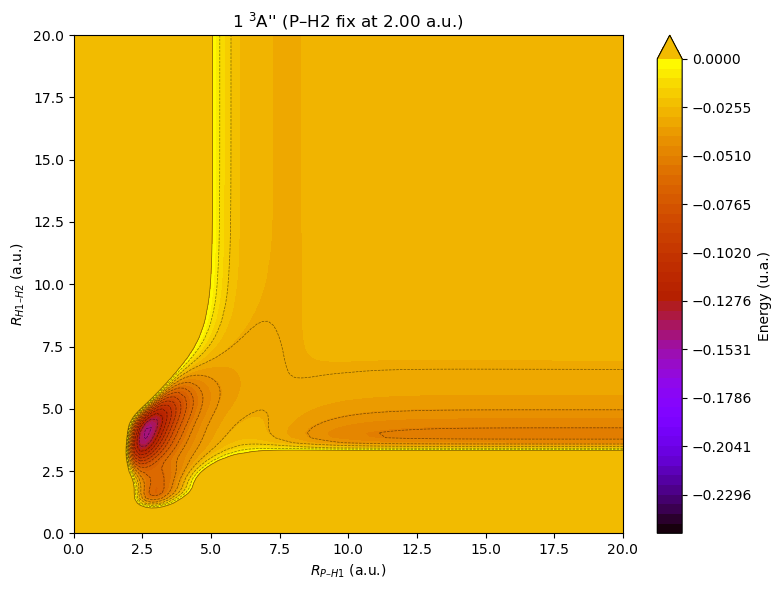

In [7]:
# Ejemplo de función analítica. Reemplaza con tu propia función.
def energia(r_PH1, r_PH2, r_HH):
    if (r_PH1 < 2.0):
        e12=4.70442*np.exp(-0.948769*r_PH1**2)-0.135445
    else:
        e12,d12=diatphm(r_PH1)
    if (r_PH2 < 2.0):
        e13=4.70442*np.exp(-0.948769*r_PH2**2)-0.135445
    else:
        e13,d13=diatphm(r_PH2)
    if (r_HH < 0.74):
        e23=1.33889*r_HH**2 - 2.92997*r_HH + 1.47035
    else:
        e23,d23=diathh(r_HH)
    # e12,d12=diatphm(r_PH1)
    # e13,d13=diatphm(r_PH2)
    # e23,d23=diathh(r_HH)
    bod3,bodd3=fitGS.fit3d(r_PH1,r_PH2,r_HH)
    if r_HH < 1.45 and r_HH > 1.35:
        print(r_HH,e23)
    # print(r_PH1,e12,r_PH2,e13,r_HH,e23,bod3,bod3+e12+e13+e23)
    return bod3 + e12 + e13 + e23

r13_fixed = 2.00

# Malla
r12_vals = np.linspace(0.0, 20.0, 100)
r23_vals = np.linspace(0.0, 20.0, 100)
R12, R23 = np.meshgrid(r12_vals, r23_vals)
E = np.zeros_like(R12)

# Calcular energía
for i in range(R12.shape[0]):
    for j in range(R12.shape[1]):
        E[i, j] = energia(R12[i, j], r13_fixed, R23[i, j])

# Colormap completo entre vmin y vmax
vmin = -0.25
vmax = 0.0
levels = np.linspace(vmin, vmax, 50)  # 100 niveles hasta 0.0, sin más
levels_cnt = np.linspace(vmin, vmax, 25)  # 100 niveles hasta 0.0, sin más

# Colormap y norm
cmap = plt.get_cmap('gnuplot').copy()
cmap.set_over(cmap(0.9))  # color para energías > vmax (amarillo brillante)
norm = Normalize(vmin=vmin, vmax=vmax, clip=False)

# Graficar
plt.figure(figsize=(8, 6))
cp = plt.contourf(R12, R23, E, levels=levels, cmap=cmap, norm=norm, extend='max')
plt.contour(R12, R23, E, levels=levels_cnt, colors='black', linewidths=0.5, ls=":",alpha=0.5)
plt.colorbar(cp, label='Energy (u.a.)')
plt.xlabel(r'$R_{P–H1}$ (a.u.)')
plt.ylabel(r'$R_{H1–H2}$ (a.u.)')
plt.title(r"1 $^3$A'' (P–H2 fix at 2.00 a.u.)")
plt.tight_layout()
plt.savefig('1_3A_prime_P_H2_fix_at_2.00.png', dpi=300,transparent=True)
plt.show()

/tmp/ipykernel_1526116/3883134875.py:59: UserWarning: The following kwargs were not used by contour: 'ls'
  plt.contour(R12, R23, E_clean, levels=levels_cnt, colors='black', linewidths=0.5, ls=":",alpha=0.5)


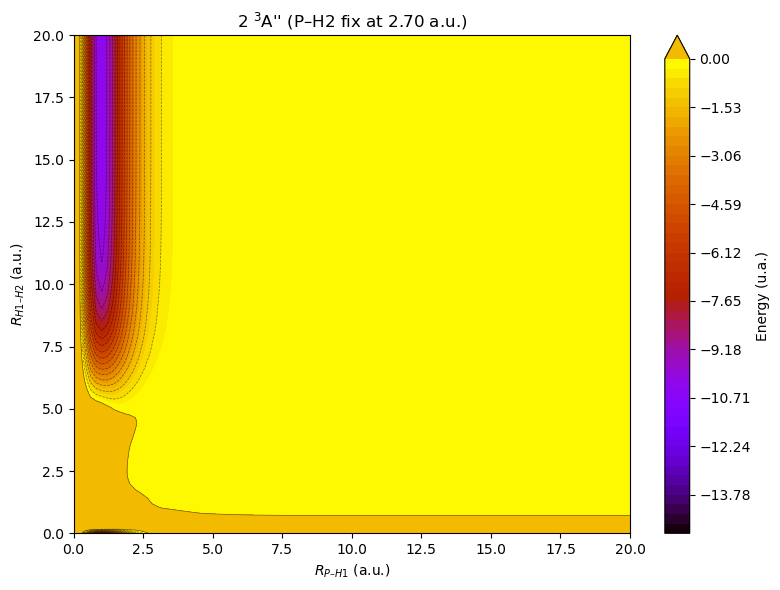

In [3]:
# Ejemplo de función analítica. Reemplaza con tu propia función.
def energia(r_PH1, r_PH2, r_HH):
    if r_PH1 < 2.0:
        e12 = 0.309099*r_PH1**2.0-1.57688*r_PH1+1.95195
    else:
        e12,d12 = diat1qsm(r_PH1)
    
    if r_PH2 < 2.0:
        e13 = 0.309099*r_PH2**2.0-1.57688*r_PH2+1.95195
    else:
        e13,d13 = diat1qsm(r_PH2)

    if r_HH < 0.74:
        e23 = 1.33889*r_HH**2.0-2.92997*r_HH+1.47035
    else:
        e23,d23 = diathh(r_HH)

    bod3,bodd3=fit1QSm.fit3d(r_PH1,r_PH2,r_HH)
    return bod3 + e12 + e13 + e23

r13_fixed = 2.7

# Malla
r12_vals = np.linspace(0.0, 20.0, 100)
r23_vals = np.linspace(0.0, 20.0, 100)
R12, R23 = np.meshgrid(r12_vals, r23_vals)
E = np.zeros_like(R12)

# Calcular energía
for i in range(R12.shape[0]):
    for j in range(R12.shape[1]):
        E[i, j] = energia(R12[i, j], r13_fixed, R23[i, j])

for i in range(R12.shape[0]):
    for j in range(R12.shape[1]):
        try:
            E[i, j] = energia(R12[i, j], r13_fixed, R23[i, j])
        except Exception as e:
            print(f"Error at ({R12[i,j]}, {R23[i,j]}): {e}")
            E[i, j] = np.nan


# Colormap completo entre vmin y vmax
vmin = -15.0
vmax = -0.0
levels = np.linspace(vmin, vmax, 50)  # 100 niveles hasta 0.0, sin más
levels_cnt = np.linspace(vmin, vmax, 25)  # 100 niveles hasta 0.0, sin más

# Colormap y norm
cmap = plt.get_cmap('gnuplot').copy()
cmap.set_over(cmap(0.9))  # color para energías > vmax (amarillo brillante)
norm = Normalize(vmin=vmin, vmax=vmax, clip=False)

E_clean = np.where(np.isnan(E) | np.isinf(E), vmax + 0.1, E)

# Graficar
plt.figure(figsize=(8, 6))
cp = plt.contourf(R12, R23, E_clean, levels=levels, cmap=cmap, norm=norm, extend='max')
plt.contour(R12, R23, E_clean, levels=levels_cnt, colors='black', linewidths=0.5, ls=":",alpha=0.5)
plt.colorbar(cp, label='Energy (u.a.)')
plt.xlabel(r'$R_{P–H1}$ (a.u.)')
plt.ylabel(r'$R_{H1–H2}$ (a.u.)')
plt.title(r"2 $^3$A'' (P–H2 fix at 2.70 a.u.)")
plt.tight_layout()
plt.savefig('2_3A_pp_P_H2_fix_at_2.70.png', dpi=300,transparent=True)
plt.show()